In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
df=pd.read_csv('/content/titanic.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.drop('PassengerId',axis=1,inplace=True)
df.drop('Cabin',axis=1,inplace=True)

In [6]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [7]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

In [8]:
df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [9]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Embarked'].fillna('S',inplace=True)

In [10]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [12]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [13]:
df.drop('Ticket',axis=1,inplace=True)

In [14]:
df.drop('Name',axis=1,inplace=True)

In [15]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['Sex']=lb.fit_transform(df['Sex'])
df['Embarked']=lb.fit_transform(df['Embarked'])

In [16]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [17]:
x=df.iloc[:,1:-1]
y=df.iloc[:,0]

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [19]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 6)
(179, 6)
(712,)
(179,)


In [20]:
mod=Sequential()
mod.add(Dense(12,activation='relu',input_dim=6))
mod.add(Dense(8,activation='relu'))
mod.add(Dense(1,activation='sigmoid'))

In [21]:
mod.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
m1=mod.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
23/23 [==============================] - 1s 13ms/step - loss: 4.8349 - accuracy: 0.3287 - val_loss: 2.7544 - val_accuracy: 0.3855
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 2.8787 - accuracy: 0.3188 - val_loss: 1.4526 - val_accuracy: 0.3687
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 1.2276 - accuracy: 0.3708 - val_loss: 0.6940 - val_accuracy: 0.5754
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6208 - accuracy: 0.6475 - val_loss: 0.6530 - val_accuracy: 0.6369
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5828 - accuracy: 0.6952 - val_loss: 0.6409 - val_accuracy: 0.6369
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5719 - accuracy: 0.6980 - val_loss: 0.6258 - val_accuracy: 0.6369
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5665 - accuracy: 0.6980 - val_loss: 0.6178 - val_accuracy: 0.6425
Epoch 8/100


In [23]:
res=pd.DataFrame(m1.history)
res['Epochs']=range(1,101)
res.tail()

,loss,accuracy,val_loss,val_accuracy,Epochs
95,0.463602,0.782303,0.462623,0.810056,96
96,0.470034,0.792135,0.469904,0.804469,97
97,0.461999,0.801966,0.465149,0.810056,98
98,0.462620,0.785112,0.459815,0.815642,99
99,0.458380,0.785112,0.465726,0.804469,100


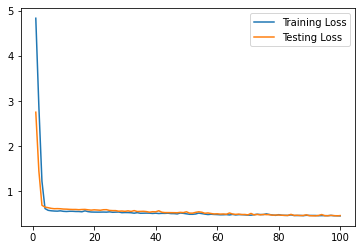

In [24]:
plt.plot(res['Epochs'],res['loss'],label='Training Loss')
plt.plot(res['Epochs'],res['val_loss'],label='Testing Loss')
plt.legend()
plt.show()

In [34]:
y_pred=mod.predict(x_test)
y_pred

array([[0.20815235],
       [0.5801919 ],
       [0.14450595],
       [0.6690688 ],
       [0.18510526],
       [0.11016995],
       [0.72578394],
       [0.70669734],
       [0.12197384],
       [0.42528293],
       [0.36137074],
       [0.3387773 ],
       [0.8295381 ],
       [0.11622551],
       [0.8804097 ],
       [0.664981  ],
       [0.42240354],
       [0.5728248 ],
       [0.17807242],
       [0.17534572],
       [0.12543121],
       [0.08536851],
       [0.5467144 ],
       [0.5567848 ],
       [0.6420852 ],
       [0.11191469],
       [0.17558151],
       [0.09196213],
       [0.14097002],
       [0.44837272],
       [0.11318117],
       [0.10311836],
       [0.9246395 ],
       [0.11792853],
       [0.10899109],
       [0.74233764],
       [0.13410243],
       [0.68886673],
       [0.14036113],
       [0.65525585],
       [0.10981932],
       [0.14151272],
       [0.12848553],
       [0.1031183 ],
       [0.47532696],
       [0.21589601],
       [0.11400148],
       [0.241

In [39]:
y_pred1 = [int(p>=0.6) for p in y_pred]
y_pred1

[0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1]

In [40]:
y_test.value_counts()

0    107
1     72
Name: Survived, dtype: int64

In [41]:
from sklearn.metrics import confusion_matrix,classification_report

In [42]:
print(confusion_matrix(y_test,y_pred1))

[[99  8]
 [27 45]]


In [43]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85       107
           1       0.85      0.62      0.72        72

    accuracy                           0.80       179
   macro avg       0.82      0.78      0.78       179
weighted avg       0.81      0.80      0.80       179



In [45]:
mod.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                84        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 197
Trainable params: 197
Non-trainable params: 0
_________________________________________________________________
